In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
def f(x):
    return np.exp(-.01*(x-30)**2) + .7*np.exp(-.005*(x-70)**2)
x = np.linspace(0,100,1000)
y = f(x)
plt.plot(x,y/sum(y))
plt.savefig('generation_distribution.pdf',bbox_inches='tight')

In [6]:
z = np.cumsum(y)/sum(y)
plt.plot(x,z)
plt.ylabel('U')
for i in range(20):
    p = np.random.rand()
    t = next(i for i in range(1000) if z[i]>=p-1e-10 )
    plt.plot([0,x[t]],z[t]*np.ones(2),'--')
    plt.plot(np.ones(2)*x[t],[0,z[t]],'--')
    plt.plot(x[t],[0],'k+')
    if i==0:
        plt.savefig('generation_inverseMethod1.pdf',bbox_inches='tight')
plt.savefig('generation_inverseMethod2.pdf',bbox_inches='tight')

In [7]:
x = np.linspace(0,100,1000)
y = f(x)
fig, ax = plt.subplots()
plt.plot(x,y)
ax.fill_between(x,x*0,y,alpha=0.5)
for i in range(1000):
    tx = np.random.rand()*100
    ty = np.random.rand()*max(y)
    if f(tx)>ty:
        plt.plot([tx],[ty],'r+')
        plt.plot([tx],[0],'k+')
    else:
        plt.plot([tx],[ty],'g*')
    if i==0:
        plt.savefig('generation_reject1.pdf',bbox_inches='tight')
    if i==10:
        plt.savefig('generation_reject2.pdf',bbox_inches='tight')
plt.savefig('generation_reject3.pdf',bbox_inches='tight')

## Generate from circle

In [25]:
fig = plt.figure()
fig.set_size_inches((5,5))
def f(x,y):
    return x*x + y*y <= 1
x = np.random.rand(2000)*2-1
y = np.random.rand(2000)*2-1
x1 = [x[i] for i in range(len(x)) if f(x[i],y[i]) ]
y1 = [y[i] for i in range(len(x)) if f(x[i],y[i]) ]
plt.plot(x1,y1,'+')
plt.savefig('generation_circle.pdf')

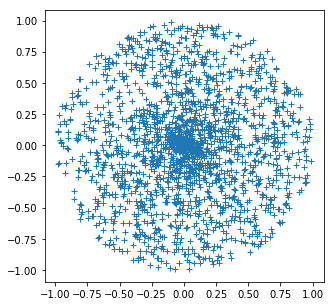

In [38]:
fig = plt.figure()
fig.set_size_inches((5,5))
r = np.random.rand(2000)
theta = np.random.rand(2000)*2*np.pi
plt.plot(r*np.cos(theta),r*np.sin(theta),'+')
plt.savefig('generation_wrongcircle.pdf')

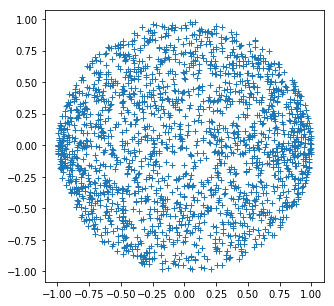

In [37]:
fig = plt.figure()
fig.set_size_inches((5,5))
x = np.random.rand(2000)*2-1
y = []
for i in range(2000):
    yy = np.random.rand()*2-1
    while not f(x[i],yy):  yy = np.random.rand()*2-1
    y.append(yy)
plt.plot(x,y,'+')
plt.savefig('generation_wrongcircle2.pdf')